In [1]:
import config
import torch
import sys
sys.path.append(config.root_path)


from Trainer import Trainer
from SemanticPequeNet import *
from util import *

from LaRS_dataset import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
in_channels             = 3
num_classes             = 3
info_dataset_resolution = 256
info_dataset_batch_size = 8
train_loader, test_loader, val_loader = get_LaRS_datasets(dataset_dir=config.dataset_path, 
                                              resolution=info_dataset_resolution, 
                                              batch_size=info_dataset_batch_size)

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

torch.Size([8, 3, 256, 256]) torch.Size([8, 1, 256, 256])


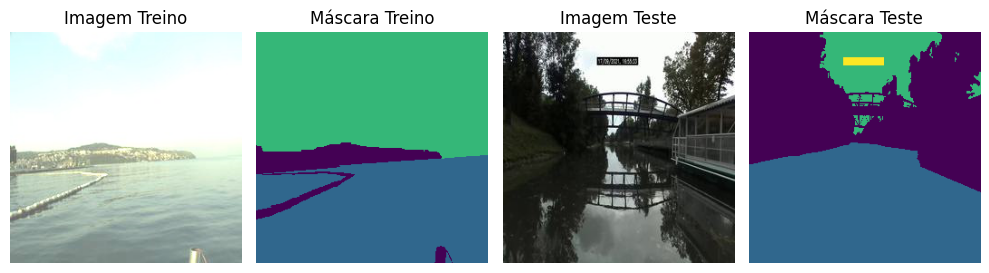

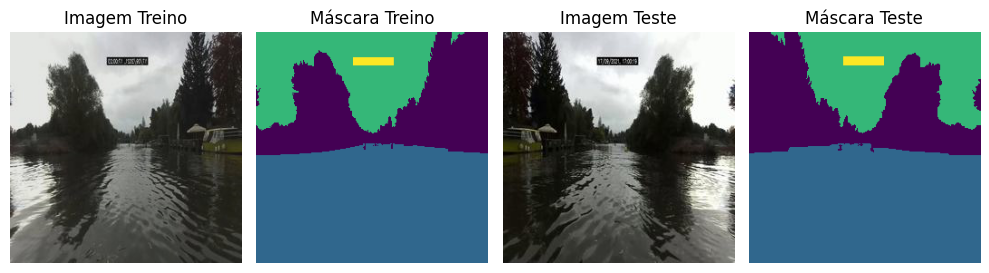

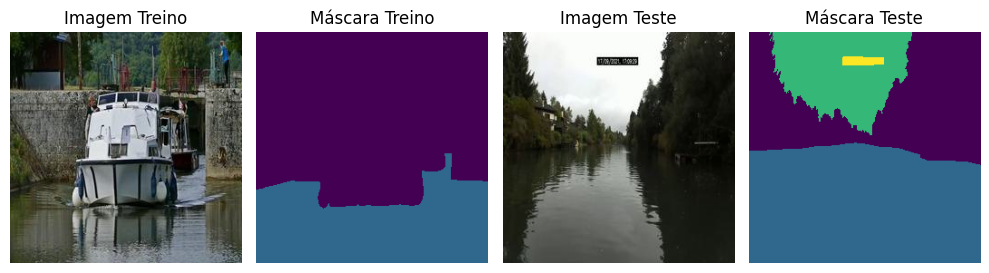

In [4]:
show_dataset_prev(train_loader, test_loader, num_images=3, num_classes=3)

In [5]:
def train(model, model_name=None, learning_rate = 1e-3, epochs=300):
    if model_name is None:
        model_name    = model.__class__.__name__
    path          = './SemanticPequeNetCIARP'
    width_modifier      = model.width_modifier
    
                
    config = f'width_modifier={width_modifier}'
    print(count_trainable_parameters(model,format=True))

    model_filename = f'{model_name}-wm{width_modifier}-epochs{epochs}.pth'


    trainer = SemanticTrainer(model_filename=model_filename, 
                    num_classes=num_classes,
                    model_dir=path, 
                    info={'config':config},
                    save_xlsx=True)
    trainer.num_classes = 1
    model = trainer.train(model, train_loader, val_loader, test_loader, 
                            num_epochs=epochs, 
                            verbose=1, 
                            save_every=5, 
                            save_outputs_every=25,
                            learning_rate=learning_rate,
                            continue_from_last=True)
    model.to(device)
    trainer.save_sample_output(test_loader,[0,1,2,3,4])
    del model
    clear_gpu()


In [6]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=0.5)
train(model)

51.987
trainable_parameters: 51987
Parando na época 61 por early stopping. 0.2847 Dice: 0.9411 mIoU: 0.8962 IoU: 0.7606 Precision: 0.9482 Recall: 0.9356 Q: 0.8513 Tempo total: 00:46:21 LR:0.000500

Melhor modelo:
 Epoch [41/300] - Loss: 0.0650 Val Loss: 0.1708 Dice: 0.9535 mIoU: 0.9146 IoU: 0.7653 Precision: 0.9376 Recall: 0.9719 Q: 0.8757 Tempo total: 00:31:11 LR:0.001000
Ultimo modelo:
 Epoch [61/300] - Loss: 0.0450 Val Loss: 0.2847 Dice: 0.9411 mIoU: 0.8962 IoU: 0.7606 Precision: 0.9482 Recall: 0.9356 Q: 0.8513 Tempo total: 00:46:21 LR:0.000500 FPS: 562.69
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-wm0.5-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outp

In [9]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=1.0)
train(model)

179.123
trainable_parameters: 179123
Parando na época 65 por early stopping. 0.3620 Dice: 0.9503 mIoU: 0.9105 IoU: 0.7731 Precision: 0.9454 Recall: 0.9596 Q: 0.8708 Tempo total: 01:34:23 LR:0.000250

Melhor modelo:
 Epoch [45/300] - Loss: 0.0362 Val Loss: 0.1966 Dice: 0.9548 mIoU: 0.9172 IoU: 0.7677 Precision: 0.9500 Recall: 0.9619 Q: 0.8796 Tempo total: 01:05:27 LR:0.000500
Ultimo modelo:
 Epoch [65/300] - Loss: 0.0274 Val Loss: 0.3620 Dice: 0.9503 mIoU: 0.9105 IoU: 0.7731 Precision: 0.9454 Recall: 0.9596 Q: 0.8708 Tempo total: 01:34:23 LR:0.000250 FPS: 264.64
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-wm1.0-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-wm1.0-epochs300.png saved.
./SemanticPequeNetCIARP/ou